In [ ]:
import os
os.chdir('/home/rm/ssd2/langcao/workspace/tablemaster')
!pwd

In [2]:
import os
import sys
import json
import glob
from tqdm import tqdm
import numpy as np
import pandas as pd
import tiktoken
import seaborn as sns
import matplotlib.pyplot as plt

sys.path.append('./')
from evaluate.evaluator import eval_qa, eval_fact
from table_utils import format_table

In [3]:
plt.rcParams['font.family'] = 'Calibri'

models = ['gpt4o', 'gpt4m', 'gpt35']
# colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

color_mapping = {
    'Table': '#1f77b4',
    'Table + Verbal': '#ff7f0e',
    'Table + Verbal Plus': '#2ca02c'
}


In [4]:
results = {
    'gpt4o': {
        'Table': 0.7307,
        'Table + Verbal': 0.7366,
        'Table + Verbal Plus': 0.7366,
    },
    'gpt4m': {
        'Table': 0.5953,
        'Table + Verbal': 0.6105,
        'Table + Verbal Plus': 0.6163,
    },
    'gpt35': {
        'Table': 0.5658,
        'Table + Verbal': 0.5732,
        'Table + Verbal Plus': 0.5815,
    }
}

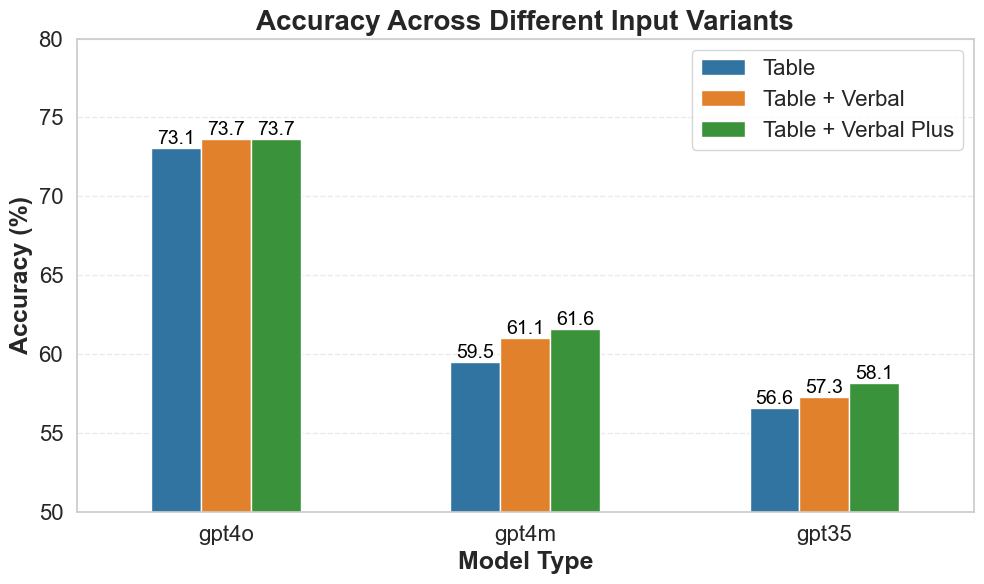

In [9]:
# Convert dictionary to DataFrame for Seaborn plotting
df = pd.DataFrame(results).reset_index().melt(id_vars='index', var_name='Model', value_name='Accuracy')
df.rename(columns={'index': 'Input Variant'}, inplace=True)
df['Accuracy'] = df['Accuracy'] * 100


# Plot using Seaborn with updated aesthetics and improved transparency
fig, ax = plt.subplots(figsize=(10, 6))

sns.barplot(data=df, x="Model", y="Accuracy", hue="Input Variant", ax=ax, palette=color_mapping, alpha=1, width=0.5)

# Annotate each bar with the corresponding accuracy value (without '%')
for container in ax.containers:
    plt.bar_label(container, fmt="%.1f", label_type="edge", fontsize=14, color="black")

# Customize plot with enhanced titles and labels
sns.set_theme(style="whitegrid")
plt.title("Accuracy Across Different Input Variants", fontsize=20, fontweight='bold')
plt.xlabel("Model Type", fontsize=18, fontweight='bold')
plt.ylabel("Accuracy (%)", fontsize=18, fontweight='bold')
plt.ylim(50, 80)  # Adjusted for the accuracy range
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.4)

# Show plot with tight layout
plt.tight_layout()
plt.savefig('figures/analysis/verbal_analysis.svg', format='svg', dpi=300, bbox_inches='tight')
plt.show()